# An Exploration of UW Pharmacy Student Reflections

Author: Marlon Fu (marlonfu@berkeley.edu)

## Libraries and Dependencies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import spacy

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MarlonFu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/MarlonFu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import and Pre-process Data

In [46]:
data = pd.read_csv("data/choiceboard_data.csv")[["CPD_Q1", "CPD_Q3"]]
data = data.dropna()
print('There are ' + str(data.shape[0]) + ' rows.')
data.head()

There are 104 rows.


,CPD_Q1,CPD_Q3
0,The class time devoted to health and wellness ...,I believe self-care to be really important in ...
1,The class time devoted to health and wellness ...,The time spent on my choice of self-care allow...
2,The class time has reminded me on the importan...,The time spent on my choice of self care affec...
3,The class time that was devoted to health and ...,It made me more relaxed and less stressed abou...
4,I have learnt to listen to people without inte...,This has been a lifeline because I always felt...


In [47]:
#adding clearly neutral stopwords that are specific to this program or activity
stopwords = nltk.corpus.stopwords.words('english')

# stopwords.append('pharmacy')
# stopwords.append('pharmacist')
# stopwords.append('pharmacists')
# stopwords.append('health')
# stopwords.append('healthcare')
# stopwords.append('practitioner')
# stopwords.append('mental')
# stopwords.append('wellness')
# stopwords.append('self-care')
# stopwords.append('mentor')
# stopwords.append('WIP')
# stopwords.append('class')
# stopwords.append('school')
# stopwords.append('peers')
# stopwords.append('classmates')
# stopwords.append('quarter')
# stopwords.append('spring')
# stopwords.append('winter')
# stopwords.append('fall')

stopwords = list(stopwords)

def remove_stopwords(text):
    return [word for word in text.split() if word not in stopwords]

In [58]:
data['CPD_Q1 No Stopwords'] = data['CPD_Q1'].apply(remove_stopwords)
data['CPD_Q3 No Stopwords'] = data['CPD_Q3'].apply(remove_stopwords)
data.head()

,CPD_Q1,CPD_Q3,CPD_Q1 No Stopwords,CPD_Q3 No Stopwords,CPD_Q1 Word Count,CPD_Q3 Word Count,CPD_Q1 No Stopwords Word Count,CPD_Q3 No Stopwords Word Count
0,The class time devoted to health and wellness ...,I believe self-care to be really important in ...,"[The, class, time, devoted, health, wellness, ...","[I, believe, self-care, really, important, liv...",88,37,53,53
1,The class time devoted to health and wellness ...,The time spent on my choice of self-care allow...,"[The, class, time, devoted, health, wellness, ...","[The, time, spent, choice, self-care, allowed,...",78,26,42,42
2,The class time has reminded me on the importan...,The time spent on my choice of self care affec...,"[The, class, time, reminded, importance, self,...","[The, time, spent, choice, self, care, affecte...",91,63,44,44
3,The class time that was devoted to health and ...,It made me more relaxed and less stressed abou...,"[The, class, time, devoted, health, wellness, ...","[It, made, relaxed, less, stressed, upcoming, ...",38,34,16,16
4,I have learnt to listen to people without inte...,This has been a lifeline because I always felt...,"[I, learnt, listen, people, without, interrupt...","[This, lifeline, I, always, felt, like, I, was...",58,50,29,29


In [59]:
# Word count
data['CPD_Q1 Word Count'] = data['CPD_Q1'].apply(lambda n: len(n.split()))
data['CPD_Q3 Word Count'] = data['CPD_Q3'].apply(lambda n: len(n.split()))

data['CPD_Q1 No Stopwords Word Count'] = data['CPD_Q1 No Stopwords'].apply(lambda n: len(n))
data['CPD_Q3 No Stopwords Word Count'] = data['CPD_Q3 No Stopwords'].apply(lambda n: len(n))
data.head()

,CPD_Q1,CPD_Q3,CPD_Q1 No Stopwords,CPD_Q3 No Stopwords,CPD_Q1 Word Count,CPD_Q3 Word Count,CPD_Q1 No Stopwords Word Count,CPD_Q3 No Stopwords Word Count
0,The class time devoted to health and wellness ...,I believe self-care to be really important in ...,"[The, class, time, devoted, health, wellness, ...","[I, believe, self-care, really, important, liv...",88,37,53,19
1,The class time devoted to health and wellness ...,The time spent on my choice of self-care allow...,"[The, class, time, devoted, health, wellness, ...","[The, time, spent, choice, self-care, allowed,...",78,26,42,15
2,The class time has reminded me on the importan...,The time spent on my choice of self care affec...,"[The, class, time, reminded, importance, self,...","[The, time, spent, choice, self, care, affecte...",91,63,44,37
3,The class time that was devoted to health and ...,It made me more relaxed and less stressed abou...,"[The, class, time, devoted, health, wellness, ...","[It, made, relaxed, less, stressed, upcoming, ...",38,34,16,18
4,I have learnt to listen to people without inte...,This has been a lifeline because I always felt...,"[I, learnt, listen, people, without, interrupt...","[This, lifeline, I, always, felt, like, I, was...",58,50,29,30


### Word and Character Count Distribution

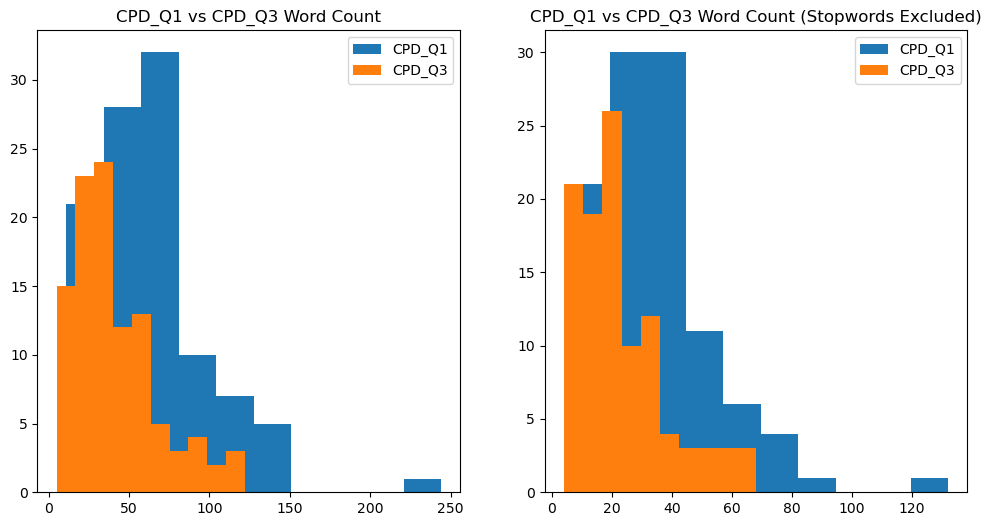

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(data['CPD_Q1 Word Count'], label='CPD_Q1')
axs[0].hist(data['CPD_Q3 Word Count'], label='CPD_Q3')
axs[0].set_title('CPD_Q1 vs CPD_Q3 Word Count')
axs[0].legend()

axs[1].hist(data['CPD_Q1 No Stopwords Word Count'], label='CPD_Q1')
axs[1].hist(data['CPD_Q3 No Stopwords Word Count'], label='CPD_Q3')
axs[1].set_title('CPD_Q1 vs CPD_Q3 Word Count (Stopwords Excluded)')
axs[1].legend()

#axs.set_xlabel('Sentence Length')
#axs.set_ylabel('Frequencey')

plt.show()